In [1]:
import utils
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = utils.load_dataset()

100%|██████████| 23/23 [00:10<00:00,  2.23it/s]


In [3]:
df = utils.clean_dataset(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053919 entries, 0 to 1053918
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   PublishYear   1053919 non-null  int64  
 1   Publisher     1053919 non-null  object 
 2   Rating        1053919 non-null  float64
 3   PagesNumber   1053919 non-null  float64
 4   TotalReviews  1053919 non-null  int64  
 5   Description   1053919 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 48.2+ MB


<AxesSubplot: >

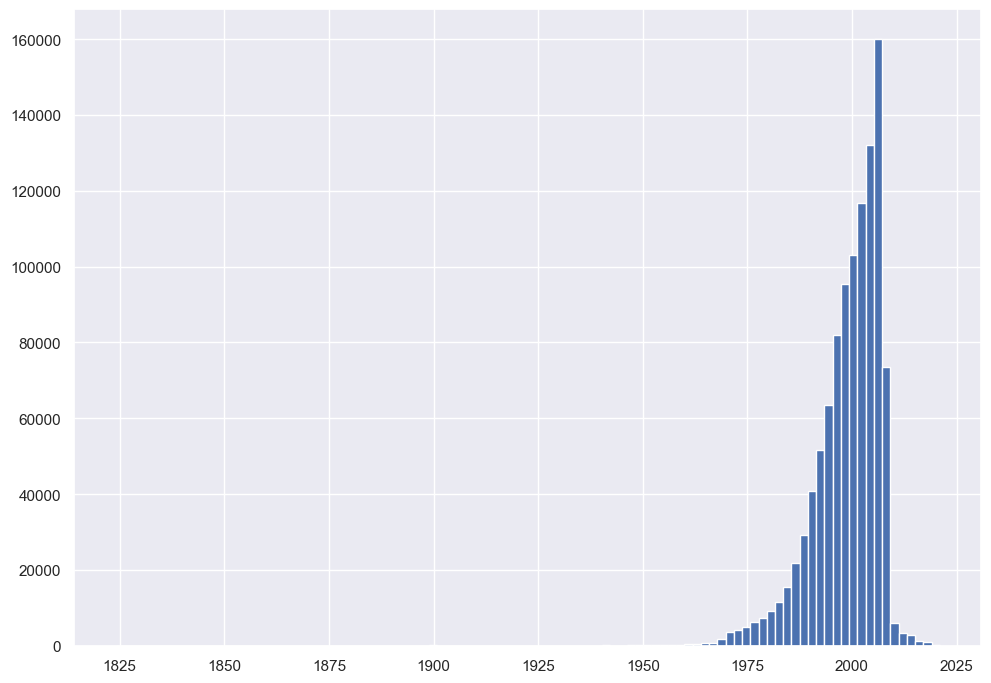

In [7]:
df.PublishYear.hist(bins=100)

# Questions about the data

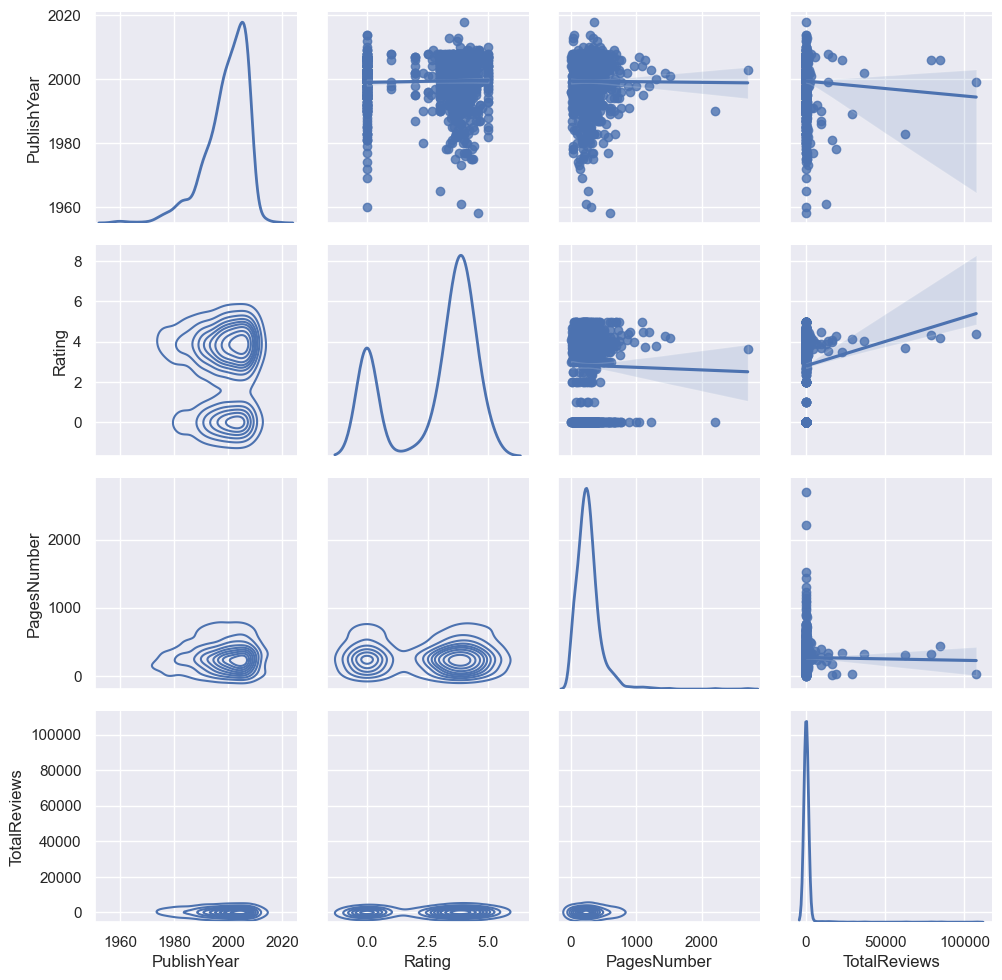

In [8]:
g = sns.PairGrid(df.sample(1000), diag_sharey=False)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

- How many different publishers are there?

In [10]:
# publishers = pd.Series(reduce(lambda x,y: x + y, df['Publisher'], []), name='Publisher')
publishers = df['Publisher'].explode()

In [11]:
publishers.nunique()

40126

- Who are the top 5 publishers (most published books)?

In [12]:
publishers_count = publishers.groupby(by=publishers).agg(count='size').sort_values(by='count', ascending=False)
publishers_count.head()

,count
Publisher,
routledge,30730
springer,29017
cambridge university press,20315
"oxford university press, usa",19582
wiley,10107


- Which are the top 5 longest books in the dataset?

In [14]:
df.head()

,PublishYear,Publisher,Rating,PagesNumber,TotalReviews,Description
0,1993,[o'reilly media],0.00,458.0,0,"these days, it's a rare person who hasn't hear..."
1,2006,[casa creación],4.00,254.0,2,<i>¡aprende a caminar en el poder de la fe vio...
2,1999,[Unknown],2.80,514.0,5,this three-level program brings you every reso...
3,1998,[wiley],3.82,224.0,11,a novel approach--very useful for quick refere...
4,2001,[running press],3.71,192.0,7,"nuevo latino never tasted as cool, hot, and de..."


In [13]:
df[['PagesNumber', 'Name']].sort_values(by=['PagesNumber'], ascending=False).head()

KeyError: "['Name'] not in index"

- What is the average/median rating of all books?

In [12]:
df['Rating'].describe()

count    1.053919e+06
mean     2.886234e+00
std      1.725453e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.670000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

- Does publisher explain amount of reviews?

In [13]:
top_publishers = publishers_count.sort_values('count', ascending=False).head(30)
# For each book, we get the intersection of its publisher with the list of top publishers
top_publishers_projection = df.Publisher.apply(set(top_publishers.index).intersection)
# We keep all books with at least 1 top publisher and keep just one
publishers_books_from_top_publishers = top_publishers_projection[top_publishers_projection.apply(len) > 0].apply(lambda s: list(s)[0])
# We get the subset of books from df which have at least 1 top publisher and make a copy
books_from_top_publishers = df.loc[publishers_books_from_top_publishers.index].copy()
# We store the top calculated publisher for each book
books_from_top_publishers['TopPublisher'] = publishers_books_from_top_publishers

[Text(0, 0, 'turtleback books'),
 Text(1, 0, 'thorndike press'),
 Text(2, 0, 'ballantine books'),
 Text(3, 0, 'harpercollins publishers'),
 Text(4, 0, 'Unknown'),
 Text(5, 0, 'dover publications'),
 Text(6, 0, "st. martin's press"),
 Text(7, 0, 'kessinger publishing'),
 Text(8, 0, 'cambridge university press'),
 Text(9, 0, 'oxford university press, usa'),
 Text(10, 0, 'university press of america'),
 Text(11, 0, 'prentice hall'),
 Text(12, 0, 'university of california press'),
 Text(13, 0, 'yale university press'),
 Text(14, 0, 'palgrave macmillan'),
 Text(15, 0, 'rowman & littlefield publishers'),
 Text(16, 0, 'authorhouse'),
 Text(17, 0, 'university of chicago press'),
 Text(18, 0, 'iuniverse'),
 Text(19, 0, 'princeton university press'),
 Text(20, 0, 'john wiley & sons'),
 Text(21, 0, 'routledge'),
 Text(22, 0, 'state university of new york press'),
 Text(23, 0, 'wiley'),
 Text(24, 0, 'wiley-blackwell'),
 Text(25, 0, 'praeger'),
 Text(26, 0, 'sage publications, inc'),
 Text(27, 0, '

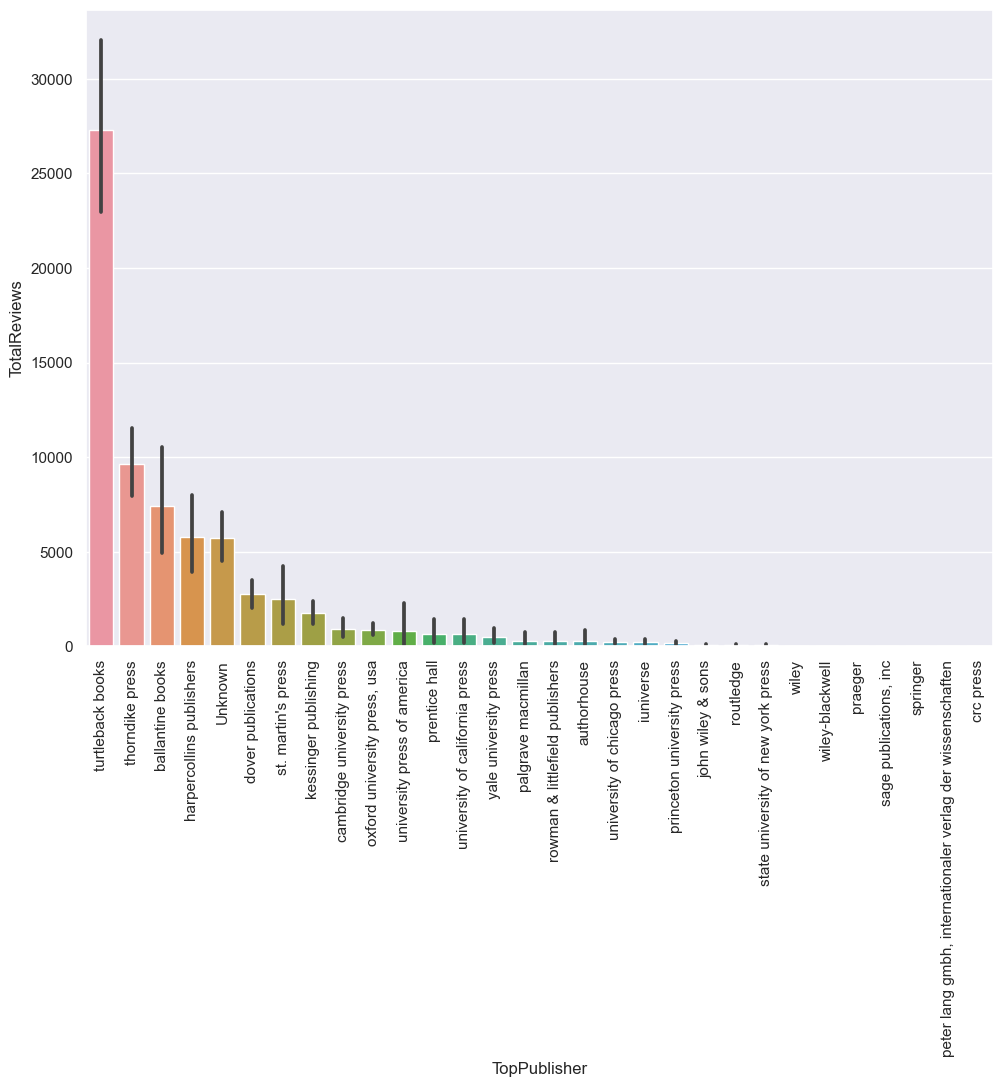

In [14]:
# keep all books which at least one of the publishers is in the set of top publishers
publishers_in_desc_order = books_from_top_publishers.groupby('TopPublisher').TotalReviews.mean().sort_values(ascending=False).index

g = sns.barplot(data=books_from_top_publishers,
                x='TopPublisher',
                y='TotalReviews',
                order=publishers_in_desc_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- Does the number of pages impact the amount of reviews?

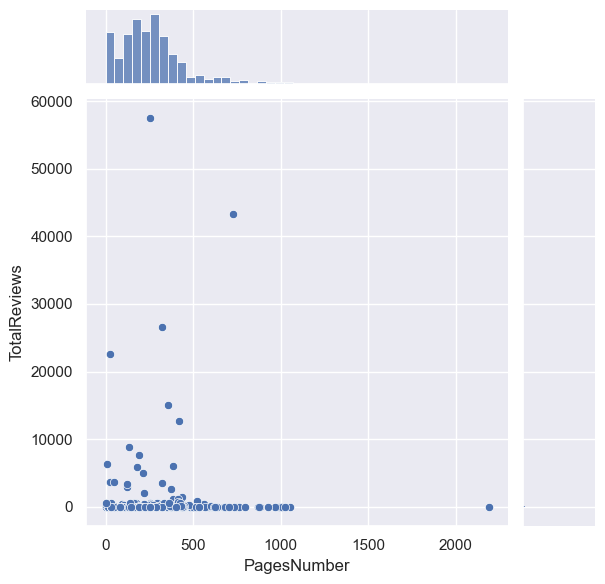

In [15]:
g = sns.jointplot(data=df.sample(500),
                x='PagesNumber',
                y='TotalReviews')
# g.set(yscale='log')
# # g.set(ylim=(0, ))
# g.set(xlim=(0, 5000))

- Does the number of reviews impact the rating?

[(0.0, 10000.0)]

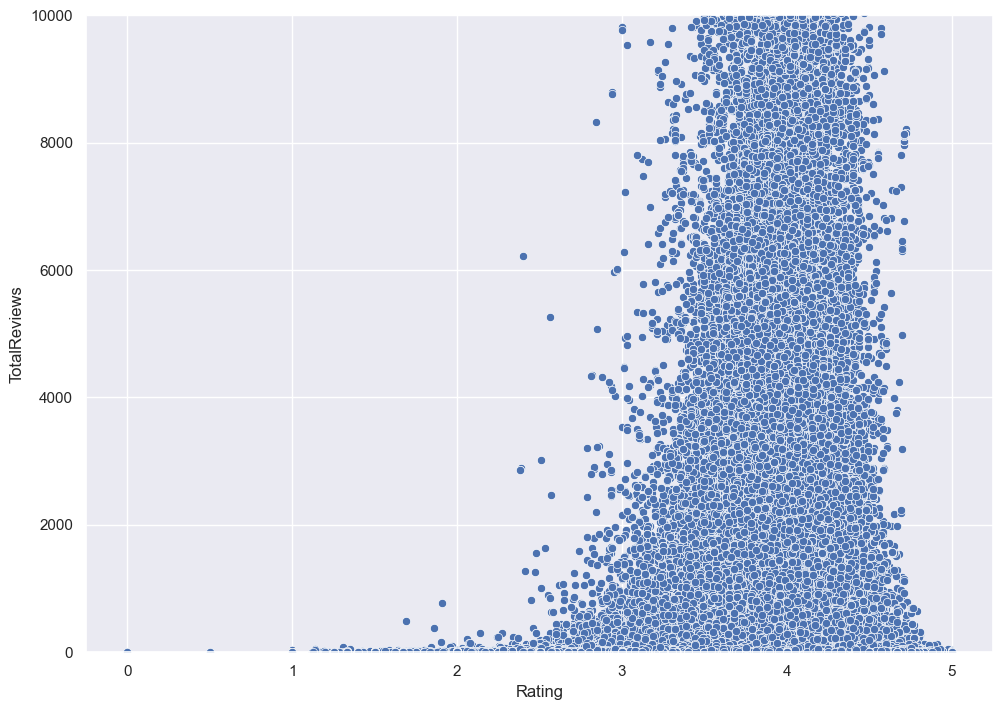

In [20]:
g = sns.scatterplot(data=df,
                x='Rating',
                y='TotalReviews')
g.set(ylim=(0, 10000))

- Is there a relationship between time since publication and amount of reviews?

In [21]:
df.PublishYear

0          1993
1          2006
2          1999
3          1998
4          1987
           ... 
1065132    2006
1065133    2004
1065134    2004
1065135    1994
1065136    2004
Name: PublishYear, Length: 1065137, dtype: int64

[Text(0, 0, '1950'),
 Text(1, 0, '1951'),
 Text(2, 0, '1952'),
 Text(3, 0, '1953'),
 Text(4, 0, '1954'),
 Text(5, 0, '1955'),
 Text(6, 0, '1956'),
 Text(7, 0, '1957'),
 Text(8, 0, '1958'),
 Text(9, 0, '1959'),
 Text(10, 0, '1960'),
 Text(11, 0, '1961'),
 Text(12, 0, '1962'),
 Text(13, 0, '1963'),
 Text(14, 0, '1964'),
 Text(15, 0, '1965'),
 Text(16, 0, '1966'),
 Text(17, 0, '1967'),
 Text(18, 0, '1968'),
 Text(19, 0, '1969'),
 Text(20, 0, '1970'),
 Text(21, 0, '1971'),
 Text(22, 0, '1972'),
 Text(23, 0, '1973'),
 Text(24, 0, '1974'),
 Text(25, 0, '1975'),
 Text(26, 0, '1976'),
 Text(27, 0, '1977'),
 Text(28, 0, '1978'),
 Text(29, 0, '1979'),
 Text(30, 0, '1980'),
 Text(31, 0, '1981'),
 Text(32, 0, '1982'),
 Text(33, 0, '1983'),
 Text(34, 0, '1984'),
 Text(35, 0, '1985'),
 Text(36, 0, '1986'),
 Text(37, 0, '1987'),
 Text(38, 0, '1988'),
 Text(39, 0, '1989'),
 Text(40, 0, '1990'),
 Text(41, 0, '1991'),
 Text(42, 0, '1992'),
 Text(43, 0, '1993'),
 Text(44, 0, '1994'),
 Text(45, 0, '1995')

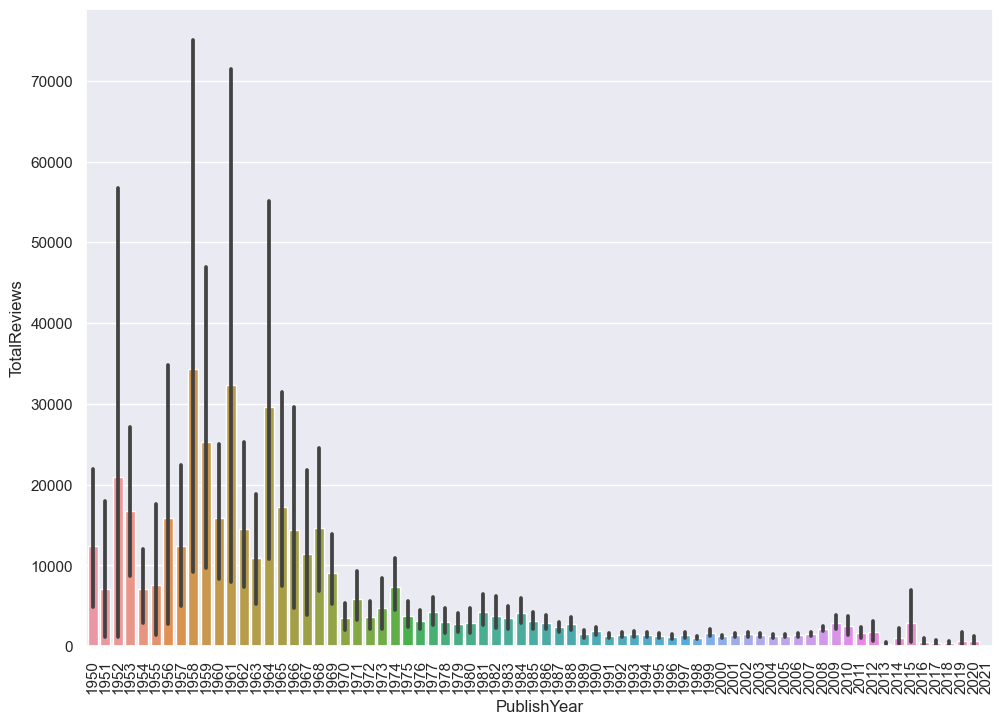

In [22]:
last_years_df = df[df['PublishYear'] >= 1950]
g = sns.barplot(data=last_years_df.sort_values(by='PublishYear'),
                x='PublishYear',
                y='TotalReviews',
                estimator="mean")
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [23]:
last_years_df[last_years_df['PublishYear'] == 2003].sort_values('TotalReviews', ascending=False).head(10)

,Name,Authors,PublishYear,Publisher,Rating,PagesNumber,TotalReviews,Description
978698,To Kill A Mockingbird,Harper Lee,2003,[Petersen],4.28,309.0,4347616,The unforgettable novel of a childhood in a sl...
371439,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,2003,"[Raincoast Books, Bloomsbury]",4.50,767.0,2437527,There is a door at the end of a silent corrido...
371438,Harry Potter and the Order of the Phoenix,J.K. Rowling,2003,"[Bloomsbury Publishing PLC, Bloomsbury]",4.50,395.0,2408318,<i>Dumbledore lowered his hands and surveyed H...
877298,The Kite Runner,Khaled Hosseini,2003,"[Bloomsbury UK, Turtleback Books]",4.30,362.0,2394717,"The unforgettable, heartbreaking story of the ..."
695509,Romeo and Juliet: Texts and Contexts,William Shakespeare,2003,[St. Martin's Press],3.75,475.0,2008217,This edition of Shakespeare's Romeo and Juliet...
886803,The Lovely Bones,Alice Sebold,2003,"[Picador, Hachette Audio, Chivers, Windsor, Pa...",3.81,328.0,2005160,"[""My name was Salmon, like the fish; first nam..."
831746,"The Da Vinci Code (Robert Langdon, #2)",Dan Brown,2003,"[Random House Audio Publishing Group, Findaway...",3.85,0.0,1908715,"With <i>The Da Vinci Code,</i> Dan Brown maste..."
831745,The Da Vinci Code (Robert Langdon #2),Dan Brown,2003,[Books on Tape],3.85,16.0,1880888,The menacing secret Catholic organization know...
476405,Le passeur,Lois Lowry,2003,[L'école des loisirs],4.13,288.0,1733156,"Dans le monde où vit Jonas, la guerre, la pauv..."
558298,Mujercitas,Louisa May Alcott,2003,"[Edimat Libros, Edimat Libros, Edimat Libros]",4.08,304.0,1636925,[<i>Mujercitas</i> es la novela parcialmente a...


In [24]:
last_years_df[last_years_df['PublishYear'] == 2009].sort_values('TotalReviews', ascending=False).head(10)

,Name,Authors,PublishYear,Publisher,Rating,PagesNumber,TotalReviews,Description
371452,Harry Potter und der Orden des Phönix (Harry P...,J.K. Rowling,2009,[Carlsen Verlag GmbH],4.50,1020.0,2492469,The fifth book in the Harry Potter series tran...
865006,The Help,Kathryn Stockett,2009,[Amy Einhorn Books/G.P. Putnam's Sons],4.46,451.0,2176064,<i>Librarian's note: An alternate cover editio...
912273,The Picture of Dorian Gray Book,Oscar Wilde,2009,[Pearson Education],4.08,74.0,955708,Classic / British English An artist paints a p...
856838,"The Girl Who Played with Fire (Millennium, #2)",Stieg Larsson,2009,[MacLehose Press],4.24,569.0,804975,Lisbeth Salander is a wanted woman. Two Millen...
410260,"If I Stay (If I Stay, #1)",Gayle Forman,2009,[Dutton Books for Young Readers],3.94,201.0,714619,<i>Librarian note: an alternate cover for this...
879470,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,2009,[Unknown],4.50,11.0,673263,All year the half-bloods have been preparing f...
357080,Great Expectations (Comics),Charles Dickens,2009,[Classical Comics],3.78,160.0,652798,"Charles Dickens' tale of Pip, Miss Havisham an..."
188715,Confessions of a Shopaholic (Movie Tie-in Edit...,Sophie Kinsella,2009,[Dell],3.65,384.0,648276,Millions of readers have come to adore New Yor...
361626,Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,2009,[Unknown],4.17,248.0,611522,The letters comprising this small charming nov...
728195,Siddhartha: An Indian Poem,Hermann Hesse,2009,[The Modern Library New York],4.03,160.0,560581,"Herman Hesse's classic novel has delighted, in..."
